# Traitement statistique des données ( Séance 5)

In [1]:
# Notre texte (corpus) qu'on va le traiter
#Methode 1 : écriture de notre texte dans un vecteur
corpus = [
    "Deep learning has made significant progress in recent years, and has even outperformed humans on many tasks like image classification.",
    "Similarly, the success of reinforcement learning to show super-human performance in some games that require sequential planning has been quite extraordinary.",
    "Therefore, it is tempting to posit that artificial intelligence might eventually come close to or even exceed the abilities of humans in a more generic way. ",
    "However, there are several fundamental technical hurdles that need to be crossed before we can build machines that learn and think like people."
]

In [ ]:
#Methode 2
#lecture de notre text à partir d'un fichier avec readlines
texte = open (" texte.txt","r")
lignes = texte.readlines ()
texte.close ()

# Exercice 1 : 
L'objet qui contient l'équivalent de corpus dans le deuxième code est lignes.
Les deux méthodes ne donnent pas exactement le même résultat.
La première méthode stocke directement les phrases dans une liste, 
alors que la deuxième méthode lit les lignes d'un fichier texte, 
ce qui peut inclure des caractères de nouvelle ligne 
ou d'autres variations en fonction du formatage du fichier texte.

In [2]:
from gensim.models import Word2Vec

In [3]:
#On découpe notre corpus en mots
tokenized_corpus =[sentence.lower().split () for sentence in corpus]
print("tokenized_corpus :",tokenized_corpus)

tokenized_corpus : [['deep', 'learning', 'has', 'made', 'significant', 'progress', 'in', 'recent', 'years,', 'and', 'has', 'even', 'outperformed', 'humans', 'on', 'many', 'tasks', 'like', 'image', 'classification.'], ['similarly,', 'the', 'success', 'of', 'reinforcement', 'learning', 'to', 'show', 'super-human', 'performance', 'in', 'some', 'games', 'that', 'require', 'sequential', 'planning', 'has', 'been', 'quite', 'extraordinary.'], ['therefore,', 'it', 'is', 'tempting', 'to', 'posit', 'that', 'artificial', 'intelligence', 'might', 'eventually', 'come', 'close', 'to', 'or', 'even', 'exceed', 'the', 'abilities', 'of', 'humans', 'in', 'a', 'more', 'generic', 'way.'], ['however,', 'there', 'are', 'several', 'fundamental', 'technical', 'hurdles', 'that', 'need', 'to', 'be', 'crossed', 'before', 'we', 'can', 'build', 'machines', 'that', 'learn', 'and', 'think', 'like', 'people.']]


# Exercice 2 : 
L'objet créé est une liste de listes appelée tokenized_corpus.
Chaque sous-liste contient les mots d'une phrase du corpus, convertis en minuscules et séparés.

In [4]:
# création de notre modèle avec Word2Vec
model = Word2Vec (sentences = tokenized_corpus, vector_size =100 , window =5 , min_count =1 , sg =0)
print("model :",model)

model : Word2Vec<vocab=73, vector_size=100, alpha=0.025>



# Exercice 3: 

Les paramètres de la fonction Word2Vec sont :

* sentences : Le corpus tokenisé.
* vector_size : La dimensionnalité des vecteurs de mots.
* window : La taille de la fenêtre de contexte.
* min_count : Le nombre minimum d'occurrences d'un mot pour être pris en compte.
* sg : L'algorithme de formation à utiliser : 1 pour Skip-Gram, 0 pour CBOW.

In [5]:
#Créer d’abord le générateur de vecteur.
word_vectors = model.wv
print("word_vectors :",word_vectors)

word_vectors : KeyedVectors<vector_size=100, 73 keys>


In [6]:
print(word_vectors ['humans'])

[-9.5773851e-03  8.9517180e-03  4.1622454e-03  9.2415577e-03
  6.6542407e-03  2.9014878e-03  9.7990260e-03 -4.4042901e-03
 -6.8138991e-03  4.2035365e-03  3.7308747e-03 -5.6777308e-03
  9.6930237e-03 -3.5574201e-03  9.5748203e-03  8.4823824e-04
 -6.3373866e-03 -1.9792777e-03 -7.3723621e-03 -3.0059204e-03
  1.0614300e-03  9.5061678e-03  9.3694627e-03 -6.5939603e-03
  3.4778586e-03  2.2877618e-03 -2.5007536e-03 -9.2230104e-03
  1.0322750e-03 -8.1539648e-03  6.3295169e-03 -5.7993405e-03
  5.5480129e-03  9.8105287e-03 -1.6001542e-04  4.5319689e-03
 -1.8080126e-03  7.3608793e-03  3.9309426e-03 -9.0229893e-03
 -2.3908676e-03  3.6185901e-03 -9.2745118e-05 -1.1872529e-03
 -1.0360378e-03 -1.6694783e-03  5.9646968e-04  4.1505853e-03
 -4.2533102e-03 -3.8282683e-03 -3.9063048e-05  2.6686373e-04
 -1.7726819e-04 -4.8007825e-03  4.3101097e-03 -2.1730107e-03
  2.1122387e-03  6.7393447e-04  5.9641898e-03 -6.8362160e-03
 -6.8201139e-03 -4.4601262e-03  9.4470102e-03 -1.5867706e-03
 -9.4270818e-03 -5.23538

In [7]:
import numpy as np
word_vectors = model.wv
selected_words =[ 'humans', 'learning' , 'artificial' ,'intelligence' , 'performance']
vectors = [ word_vectors [ word ] for word in selected_words ]
print (" taille du tableau vectors ="+ str ( len ( vectors )))
print (np.shape(vectors))
#print("vectors :",vectors )

 taille du tableau vectors =5
(5, 100)


# Exercice 4 : 
L'objet word_vectors contient les vecteurs numériques pour chaque mot du modèle Word2Vec. La dimension de chaque vecteur correspond à la taille spécifiée dans le paramètre vector_size lors de la création du modèle Word2Vec​

In [8]:
from sklearn.decomposition import PCA
#Exécution de l’ACP.
pca = PCA( n_components =4)
vectors_4d = pca.fit_transform (vectors )
print("vectors_4d :",vectors_4d)

vectors_4d : [[-0.01975415  0.03399625 -0.01859937 -0.02518473]
 [-0.03044881 -0.03378122 -0.02178805  0.01543149]
 [ 0.00153077  0.02967133  0.01943575  0.03173678]
 [-0.00201694 -0.02110691  0.04027256 -0.01969626]
 [ 0.05068913 -0.00877944 -0.01932089 -0.00228728]]


# Exercice 5 : 
L'objet vectors_4d est le résultat de l'application de l'analyse en composantes principales (PCA) 
aux vecteurs de mots. Il contient les vecteurs de mots réduits à 4 dimensions.

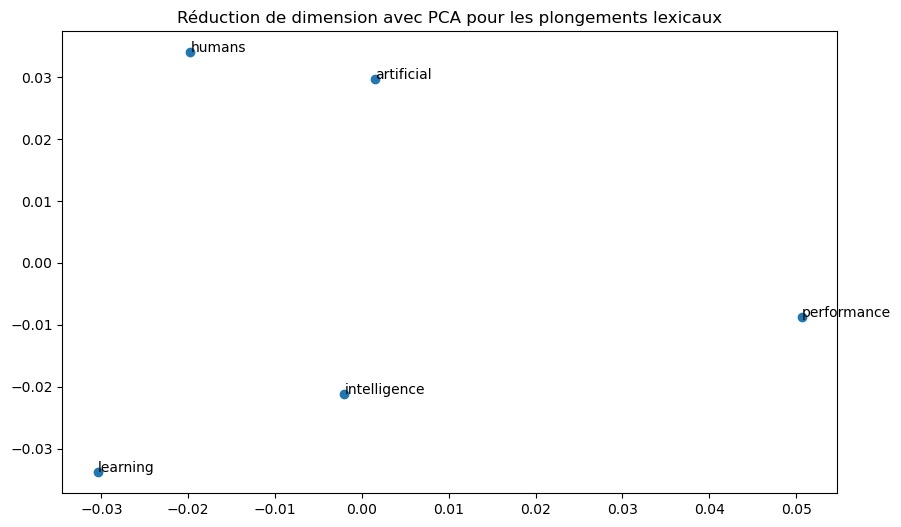

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(vectors_4d[:, 0], vectors_4d[:, 1])

for i, word in enumerate(selected_words):
    plt.annotate(word, (vectors_4d[i, 0], vectors_4d[i, 1]))

plt.title('Réduction de dimension avec PCA pour les plongements lexicaux')
plt.show()



In [10]:
#valeurs propres
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
#donc les 4 premiers axes expliquent pratiquement 100% de l information

[0.00097329 0.00092497 0.0007984  0.0005682 ]
[0.29811094 0.28331153 0.24454233 0.1740352 ]
1.0


# Exercice 6 :
Il s'agit de représenter graphiquement les mots sur le plan (3,4) de l'ACP. Cela implique d'utiliser les troisième et quatrième composantes principales au lieu des deux premières pour visualiser les mots.

# Exercice 7 :
pca.explained_variance_ indique la quantité de variance de l'ensemble des données que chaque composante principale
représente.
pca.explained_variance_ratio_ indique la proportion de la variance totale que chaque composante principale représente.
L'éboulis des valeurs propres est une visualisation de ces valeurs.

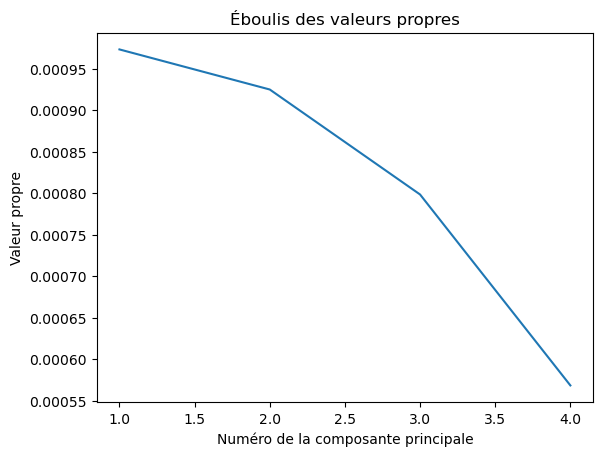

In [11]:
import numpy as np
import matplotlib.pyplot as plt

eigval = pca.explained_variance_ 
p = len(eigval)

plt.plot(np.arange(1, p + 1), eigval)
plt.title("Éboulis des valeurs propres")
plt.ylabel("Valeur propre")
plt.xlabel("Numéro de la composante principale")
plt.show()


In [12]:
#Affichage.
print ( np.shape (pca.components_ ))
print (" Coordonnees des 4 premieres variables( en colonnes ) sur les 4 premiers axes ( en lignes ):" ,pca.components_ [: ,0:4])

(4, 100)
 Coordonnees des 4 premieres variables( en colonnes ) sur les 4 premiers axes ( en lignes ): [[-0.09985251  0.01796715 -0.05110081  0.12743978]
 [-0.11317445  0.04251309  0.00064532  0.17787019]
 [ 0.10221367  0.0394959  -0.2016994  -0.16409734]
 [ 0.20320734 -0.18011255  0.06490368 -0.14368697]]


# Exercice 8 
Dans le contexte de l'ACP, une variable correspond à une caractéristique ou une dimension originale des données sur laquelle l'ACP est appliquée. 
Les résultats montrent les coefficients de corrélation entre les quatre premières variables originales et les quatre premières composantes principales. Ces coefficients aident à interpréter les composantes principales en indiquant comment chaque variable originale contribue à chaque composante principale.


# Exercice 9

covfac est la matrice des coefficients et sqrt_eigval est la racine carrée des valeurs propres. Le code multiplie ces éléments ensemble pour obtenir la corrélation entre les variables et les composantes.

In [13]:
#Obtention des corrélations variables-facteurs.
covfac = pca.components_ [: ,0:4]
sqrt_eigval = np.sqrt ( eigval )
corfac = np.zeros (( p , p ))
for k in range ( p ):
    corfac [: , k ]= covfac [k ,:] * sqrt_eigval [ k ]
print (" Correlations entre les 4 premieres variables ( en colonnes ) et les 4 premieres CP ( en lignes ):" , corfac )

 Correlations entre les 4 premieres variables ( en colonnes ) et les 4 premieres CP ( en lignes ): [[-3.11515632e-03 -3.44201244e-03  2.88813771e-03  4.84384077e-03]
 [ 5.60531525e-04  1.29296496e-03  1.11599167e-03 -4.29333180e-03]
 [-1.59422134e-03  1.96262946e-05 -5.69919528e-03  1.54710489e-03]
 [ 3.97581241e-03  5.40962560e-03 -4.63671591e-03 -3.42505734e-03]]


# Création du modèle de génération de langage avec tensorflow et keras :

In [15]:
#importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
# Tokenisation du corpus
#tockenisation est la transformation de notre texte (corpus) à un ensemble des mots pour l'entrainement
#Crée une instance de la classe Tokenizer
#Le Tokenizer de Keras est utilisé pour convertir chaque mot unique dans le corpus en un numéro (token).
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) +1

#Affichage de nombre totlae des mots +1 (74+1)=75
print(total_words)
#Affichage de la fréquence de répitition de chque mot
print(tokenizer.word_index)
# Il affiche la nature de notre tokenizer.word_index qui est un dictionnair
print(np.shape(tokenizer.word_index)) # () 

75
{'to': 1, 'that': 2, 'has': 3, 'in': 4, 'learning': 5, 'and': 6, 'even': 7, 'humans': 8, 'like': 9, 'the': 10, 'of': 11, 'deep': 12, 'made': 13, 'significant': 14, 'progress': 15, 'recent': 16, 'years': 17, 'outperformed': 18, 'on': 19, 'many': 20, 'tasks': 21, 'image': 22, 'classification': 23, 'similarly': 24, 'success': 25, 'reinforcement': 26, 'show': 27, 'super': 28, 'human': 29, 'performance': 30, 'some': 31, 'games': 32, 'require': 33, 'sequential': 34, 'planning': 35, 'been': 36, 'quite': 37, 'extraordinary': 38, 'therefore': 39, 'it': 40, 'is': 41, 'tempting': 42, 'posit': 43, 'artificial': 44, 'intelligence': 45, 'might': 46, 'eventually': 47, 'come': 48, 'close': 49, 'or': 50, 'exceed': 51, 'abilities': 52, 'a': 53, 'more': 54, 'generic': 55, 'way': 56, 'however': 57, 'there': 58, 'are': 59, 'several': 60, 'fundamental': 61, 'technical': 62, 'hurdles': 63, 'need': 64, 'be': 65, 'crossed': 66, 'before': 67, 'we': 68, 'can': 69, 'build': 70, 'machines': 71, 'learn': 72, 'th

D'après l'affichage de notre tokenizer.word_index, on remarque notre modèle généré attribue un identifiant à chaque tocken du corpus tel que les mots les plus fréquents reçoivent les indices les plus bas.

# Exercice 10
tokenizer.word_index est un dictionnaire où chaque mot unique du corpus est mappé à un index unique. total_words est le nombre total de mots uniques dans le corpus plus un. La différence avec l'objet tokenized_corpus est que tokenizer.word_index fournit un mappage unique pour chaque mot, tandis que tokenized_corpus est simplement une version tokenisée du corpus original​


In [17]:
# Création de séquences d'entrée et de sortie
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        
#affiche dernière ligne du corpus        
print("line :" ,line)
#Pour chaque phrase du corpus, le tokenizer convertit la phrase en une séquence de tokens
#affiche les tokens de la dernière ligne du corpus
print("tokenizer.texts_to_sequences([line]):",tokenizer.texts_to_sequences([line]))
print("token_list:",token_list)

#print(np.shape(input_sequences,dtype=object)) # (87,26)
print("n_gram_sequence :",n_gram_sequence)
print("input_sequences :",input_sequences)

line : However, there are several fundamental technical hurdles that need to be crossed before we can build machines that learn and think like people.
tokenizer.texts_to_sequences([line]): [[57, 58, 59, 60, 61, 62, 63, 2, 64, 1, 65, 66, 67, 68, 69, 70, 71, 2, 72, 6, 73, 9, 74]]
token_list: [57, 58, 59, 60, 61, 62, 63, 2, 64, 1, 65, 66, 67, 68, 69, 70, 71, 2, 72, 6, 73, 9, 74]
n_gram_sequence : [57, 58, 59, 60, 61, 62, 63, 2, 64, 1, 65, 66, 67, 68, 69, 70, 71, 2, 72, 6, 73, 9, 74]
input_sequences : [[12, 5], [12, 5, 3], [12, 5, 3, 13], [12, 5, 3, 13, 14], [12, 5, 3, 13, 14, 15], [12, 5, 3, 13, 14, 15, 4], [12, 5, 3, 13, 14, 15, 4, 16], [12, 5, 3, 13, 14, 15, 4, 16, 17], [12, 5, 3, 13, 14, 15, 4, 16, 17, 6], [12, 5, 3, 13, 14, 15, 4, 16, 17, 6, 3], [12, 5, 3, 13, 14, 15, 4, 16, 17, 6, 3, 7], [12, 5, 3, 13, 14, 15, 4, 16, 17, 6, 3, 7, 18], [12, 5, 3, 13, 14, 15, 4, 16, 17, 6, 3, 7, 18, 8], [12, 5, 3, 13, 14, 15, 4, 16, 17, 6, 3, 7, 18, 8, 19], [12, 5, 3, 13, 14, 15, 4, 16, 17, 6, 3, 7, 18

# Exercice 11
Tokenisation : Chaque ligne de texte du corpus est convertie en une séquence de tokens numériques à l'aide du tokenizer. Ce processus transforme les mots en entiers uniques qui les représentent, permettant ainsi au modèle d'interpréter les mots comme des entrées numériques.

Création de séquences d'entrée : Pour chaque ligne de texte tokenisée, des séquences de n-grammes sont générées. Un n-gramme est une sous-séquence de n éléments consécutifs tirés d'une séquence donnée. Ici, des séquences de n-grammes sont créées en ajoutant progressivement un token à la séquence jusqu'à ce que toute la ligne soit représentée.

Résultat de la dernière ligne : La dernière ligne du corpus, "However, there are several fundamental technical hurdles that need to be crossed before we can build machines that learn and think like people.", est transformée en une série de tokens, chacun représentant un mot unique de la ligne.

Séquences de n-grammes : Le résultat montre que pour la dernière ligne, une séquence complète de tokens est générée. Cette séquence représente l'intégralité de la ligne en termes de tokens numériques.

Input_sequences : La variable input_sequences contient toutes les séquences de n-grammes générées à partir du corpus. Cela inclut non seulement la séquence complète pour chaque ligne, mais aussi toutes les sous-séquences possibles.

In [18]:
# Remplissage des séquences avec des 0 pour les rendre de même longueur
max_sequence_length = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

print(max_sequence_length)
print(np.shape(input_sequences)) # (87,26)
print(input_sequences)

26
(87, 26)
[[ 0  0  0 ...  0 12  5]
 [ 0  0  0 ... 12  5  3]
 [ 0  0  0 ...  5  3 13]
 ...
 [ 0  0  0 ... 72  6 73]
 [ 0  0  0 ...  6 73  9]
 [ 0  0  0 ... 73  9 74]]


# Exercice 12
input_sequences a une taille de (87, 26). Cela signifie qu'il y a 87 séquences et chaque séquence a été complétée pour avoir une longueur de 26 tokens.

In [19]:
# Séparation des séquences en entrées et sorties
X, y = input_sequences[:, :-1], input_sequences[:, -1]
print(np.shape(X)) # (87,25)
print(X)
print(np.shape(y)) # (87,)
print(y) # dernier mot de chaque séquence

(87, 25)
[[ 0  0  0 ...  0  0 12]
 [ 0  0  0 ...  0 12  5]
 [ 0  0  0 ... 12  5  3]
 ...
 [ 0  0  0 ...  2 72  6]
 [ 0  0  0 ... 72  6 73]
 [ 0  0  0 ...  6 73  9]]
(87,)
[ 5  3 13 14 15  4 16 17  6  3  7 18  8 19 20 21  9 22 23 10 25 11 26  5
  1 27 28 29 30  4 31 32  2 33 34 35  3 36 37 38 40 41 42  1 43  2 44 45
 46 47 48 49  1 50  7 51 10 52 11  8  4 53 54 55 56 58 59 60 61 62 63  2
 64  1 65 66 67 68 69 70 71  2 72  6 73  9 74]


# Exercice 13 
Taille de X et y :

* X a une taille de (87, 25), ce qui signifie qu'il y a 87 séquences d'entrée et chaque séquence a une longueur de 25 tokens.
* y a une taille de (87,), indiquant qu'il y a 87 labels cibles correspondants, un pour chaque séquence d'entrée dans X.

Contenu de X et y :

* X contient les séquences de tokens utilisées comme données d'entrée pour le modèle. Chaque séquence est un vecteur de tokens qui représente une phrase ou une partie d'une phrase avec un token manquant à la fin.
* y contient les tokens qui sont les mots suivants dans le corpus pour chaque séquence correspondante dans X. Ces tokens sont les cibles que le modèle doit apprendre à prédire après avoir reçu la séquence d'entrée X.

En termes de traitement de langage naturel (NLP), X serait la "phrase contexte" et y serait le "mot suivant" que le modèle tente de prédire. Cela permet au modèle de se former à prédire le prochain mot sur la base du contexte fourni par la séquence de mots précédents.

In [20]:
# Conversion des sorties en format one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=total_words)
print(y)
print(np.shape(y)) # (87,75)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(87, 75)


# Exercice 14
Le contenu de y après la conversion en one-hot encoding est donc une matrice où chaque ligne correspond à un vecteur one-hot qui représente le mot suivant dans la séquence des données d'entrée. La taille de cette matrice est donnée par (87, 75), indiquant qu'il y a 87 vecteurs one-hot et chaque vecteur a une longueur de 75, ce qui correspond au nombre total de mots uniques dans le corpus (ou total_words).

Chaque vecteur one-hot dans y est une représentation binaire du mot suivant dans la séquence, où la position du '1' dans le vecteur correspond à l'indice du mot dans le vocabulaire du tokenizer. Cela permet au modèle d'identifier précisément quel mot il doit prédire après avoir reçu une séquence d'entrée

In [21]:
# Définition du modèle LSTM
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_length-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

# Exercice 15

LSTM signifie "Long Short-Term Memory". C'est un type spécial de réseau de neurones récurrents (RNN) capable de capturer des dépendances à long terme dans les séquences de données. Les LSTMs sont conçus pour éviter le problème de disparition du gradient qui est courant avec les RNN standards, ce qui les rend très efficaces pour apprendre à partir de séquences de données longues et de diverses longueurs.

Un modèle LSTM peut avoir une ou plusieurs couches. Dans le code fourni, le modèle LSTM a une seule couche LSTM, indiquée par LSTM(100), où 100 est le nombre d'unités de mémoire, dans la couche LSTM. Cette couche LSTM est suivie d'une couche dense qui sert à la classification ou à la prédiction du prochain mot dans la séquence.

En entrée, le modèle LSTM prend des séquences de tokens qui ont été préalablement intégrées dans un espace vectoriel continu par la couche d'embedding.

En sortie, il produit une distribution de probabilité sur le vocabulaire des mots possibles, indiquant le mot suivant le plus probable dans la séquence.

In [22]:
# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Exercice 16 : Ajoute d’autres mesures de performance pour ce modèle.


In [ ]:
from tensorflow.keras.metrics import Precision, Recall

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy', Precision(), Recall()])


In [23]:
# Entraînement du modèle
model.fit(X, y, epochs =100 , verbose =1)

Epoch 1/100
3/3 [==============================] - 2s 15ms/step - loss: 4.3190 - accuracy: 0.0230
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 4.3109 - accuracy: 0.0575
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 4.3039 - accuracy: 0.0575
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 4.2947 - accuracy: 0.0575
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 4.2816 - accuracy: 0.0575
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 4.2643 - accuracy: 0.0575
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 4.2101 - accuracy: 0.0460
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 4.1697 - accuracy: 0.0460
Epoch 9/100
3/3 [==============================] - 0s 10ms/step - loss: 4.1662 - accuracy: 0.0345
Epoch 10/100
3/3 [==============================] - 0s 9ms/step - loss: 4.1227 - accuracy: 0.0460
Epoch 11/100
3/3 [======

3/3 [==============================] - 0s 8ms/step - loss: 1.2858 - accuracy: 0.8046
Epoch 85/100
3/3 [==============================] - 0s 7ms/step - loss: 1.2658 - accuracy: 0.8391
Epoch 86/100
3/3 [==============================] - 0s 16ms/step - loss: 1.2510 - accuracy: 0.8621
Epoch 87/100
3/3 [==============================] - 0s 17ms/step - loss: 1.2266 - accuracy: 0.8506
Epoch 88/100
3/3 [==============================] - 0s 18ms/step - loss: 1.2093 - accuracy: 0.8506
Epoch 89/100
3/3 [==============================] - 0s 10ms/step - loss: 1.1951 - accuracy: 0.8391
Epoch 90/100
3/3 [==============================] - 0s 8ms/step - loss: 1.1923 - accuracy: 0.8736
Epoch 91/100
3/3 [==============================] - 0s 8ms/step - loss: 1.1699 - accuracy: 0.8966
Epoch 92/100
3/3 [==============================] - 0s 8ms/step - loss: 1.1535 - accuracy: 0.8966
Epoch 93/100
3/3 [==============================] - 0s 8ms/step - loss: 1.1441 - accuracy: 0.8851
Epoch 94/100
3/3 [===========

# Exercice 17

X est la séquence de tokens et y est la séquence cible en format one-hot encoding que le modèle prédira.

epochs=100 : le modèle va s'entraîner en passant 100 fois sur l'ensemble du jeu de données.

verbose=1 : le modèle affichera une barre de progression ainsi que les pertes et les métriques pour chaque époque pendant l'entraînement.


In [24]:
# Fonction pour générer du texte
def generate_text(seed_text, next_words, model, max_sequence_length):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)[0]

        # Choisissez l'index du mot avec la probabilité maximale
        predicted_index = np.argmax(predicted_probs)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word

    return seed_text

In [25]:
# Génération de texte à partir d'une graine
generated_text = generate_text("machine learning", 10, model, max_sequence_length)
print(generated_text)

machine learning learning has made significant progress in recent years and has


# Exercice 18

Les paramètres de la fonction generate_text sont les suivants :

* seed_text : Le texte initial à partir duquel le modèle commence à générer du texte. Il s'agit de la séquence de départ que le modèle utilisera pour prédire le mot suivant.
* next_words : Le nombre de mots supplémentaires que le modèle doit générer après le seed_text.
* model : Le modèle de machine learning pré-entraîné qui est utilisé pour générer le texte.
* max_sequence_length : La longueur maximale d'une séquence de texte que le modèle peut prendre en entrée, ce qui correspond généralement à la longueur des séquences sur lesquelles le modèle a été entraîné.

Quant à savoir si le modèle peut prédire des mots hors du corpus, cela dépend du vocabulaire connu par le modèle, qui est limité aux mots qu'il a vus pendant l'entraînement. 

# Exercice 19
On excécuter la fonction avec d’autres entrées. 


In [28]:
new_seed_text = "deep learning now"
new_next_words = 15  # Générer 15 mots supplémentaires
generated_text = generate_text(new_seed_text, new_next_words, model, max_sequence_length)
print(generated_text)


deep learning now has made significant progress in recent years and has even outperformed humans on many tasks


Pour les améliorations possibles du modèle :

* Augmenter le dataset : Plus le modèle est exposé à un large éventail de phrases et de structures grammaticales, mieux il peut apprendre et généraliser. Ajouter plus de données d'entraînement peut améliorer sa performance.

* Fine-tuning des hyperparamètres : Ajuster les hyperparamètres comme le nombre d'unités LSTM, la taille des embeddings, le nombre de couches dans le réseau, les taux d'apprentissage, etc., peut aider à trouver une meilleure configuration pour le modèle.